# ScientISST INBIO workshop
Welcome to the **ScientISST workshop "Introduction to Biomedic sensors"**. 

Here you'll find useful code to perform an ECG acquisition on yourself and process it. 

## Task 1 - Getting started

### 1. Turn on your ScientISST device

Connect a battery and turn on the device until the white LED blinks

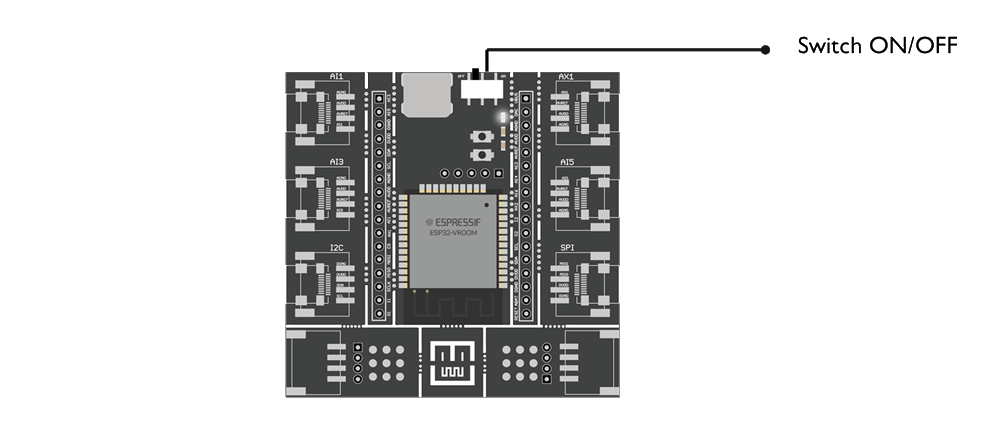

Enable Bluetooth on your computer and connect to "ScientISST-XX-XX" where XX-XX is the tag of your device.

### 2. Start a simple acquisition

Now, go to the scientISST webpage for acquisition: https://sense.scientisst.com/#/

Let's setup the acquisition settings. Click "settings".

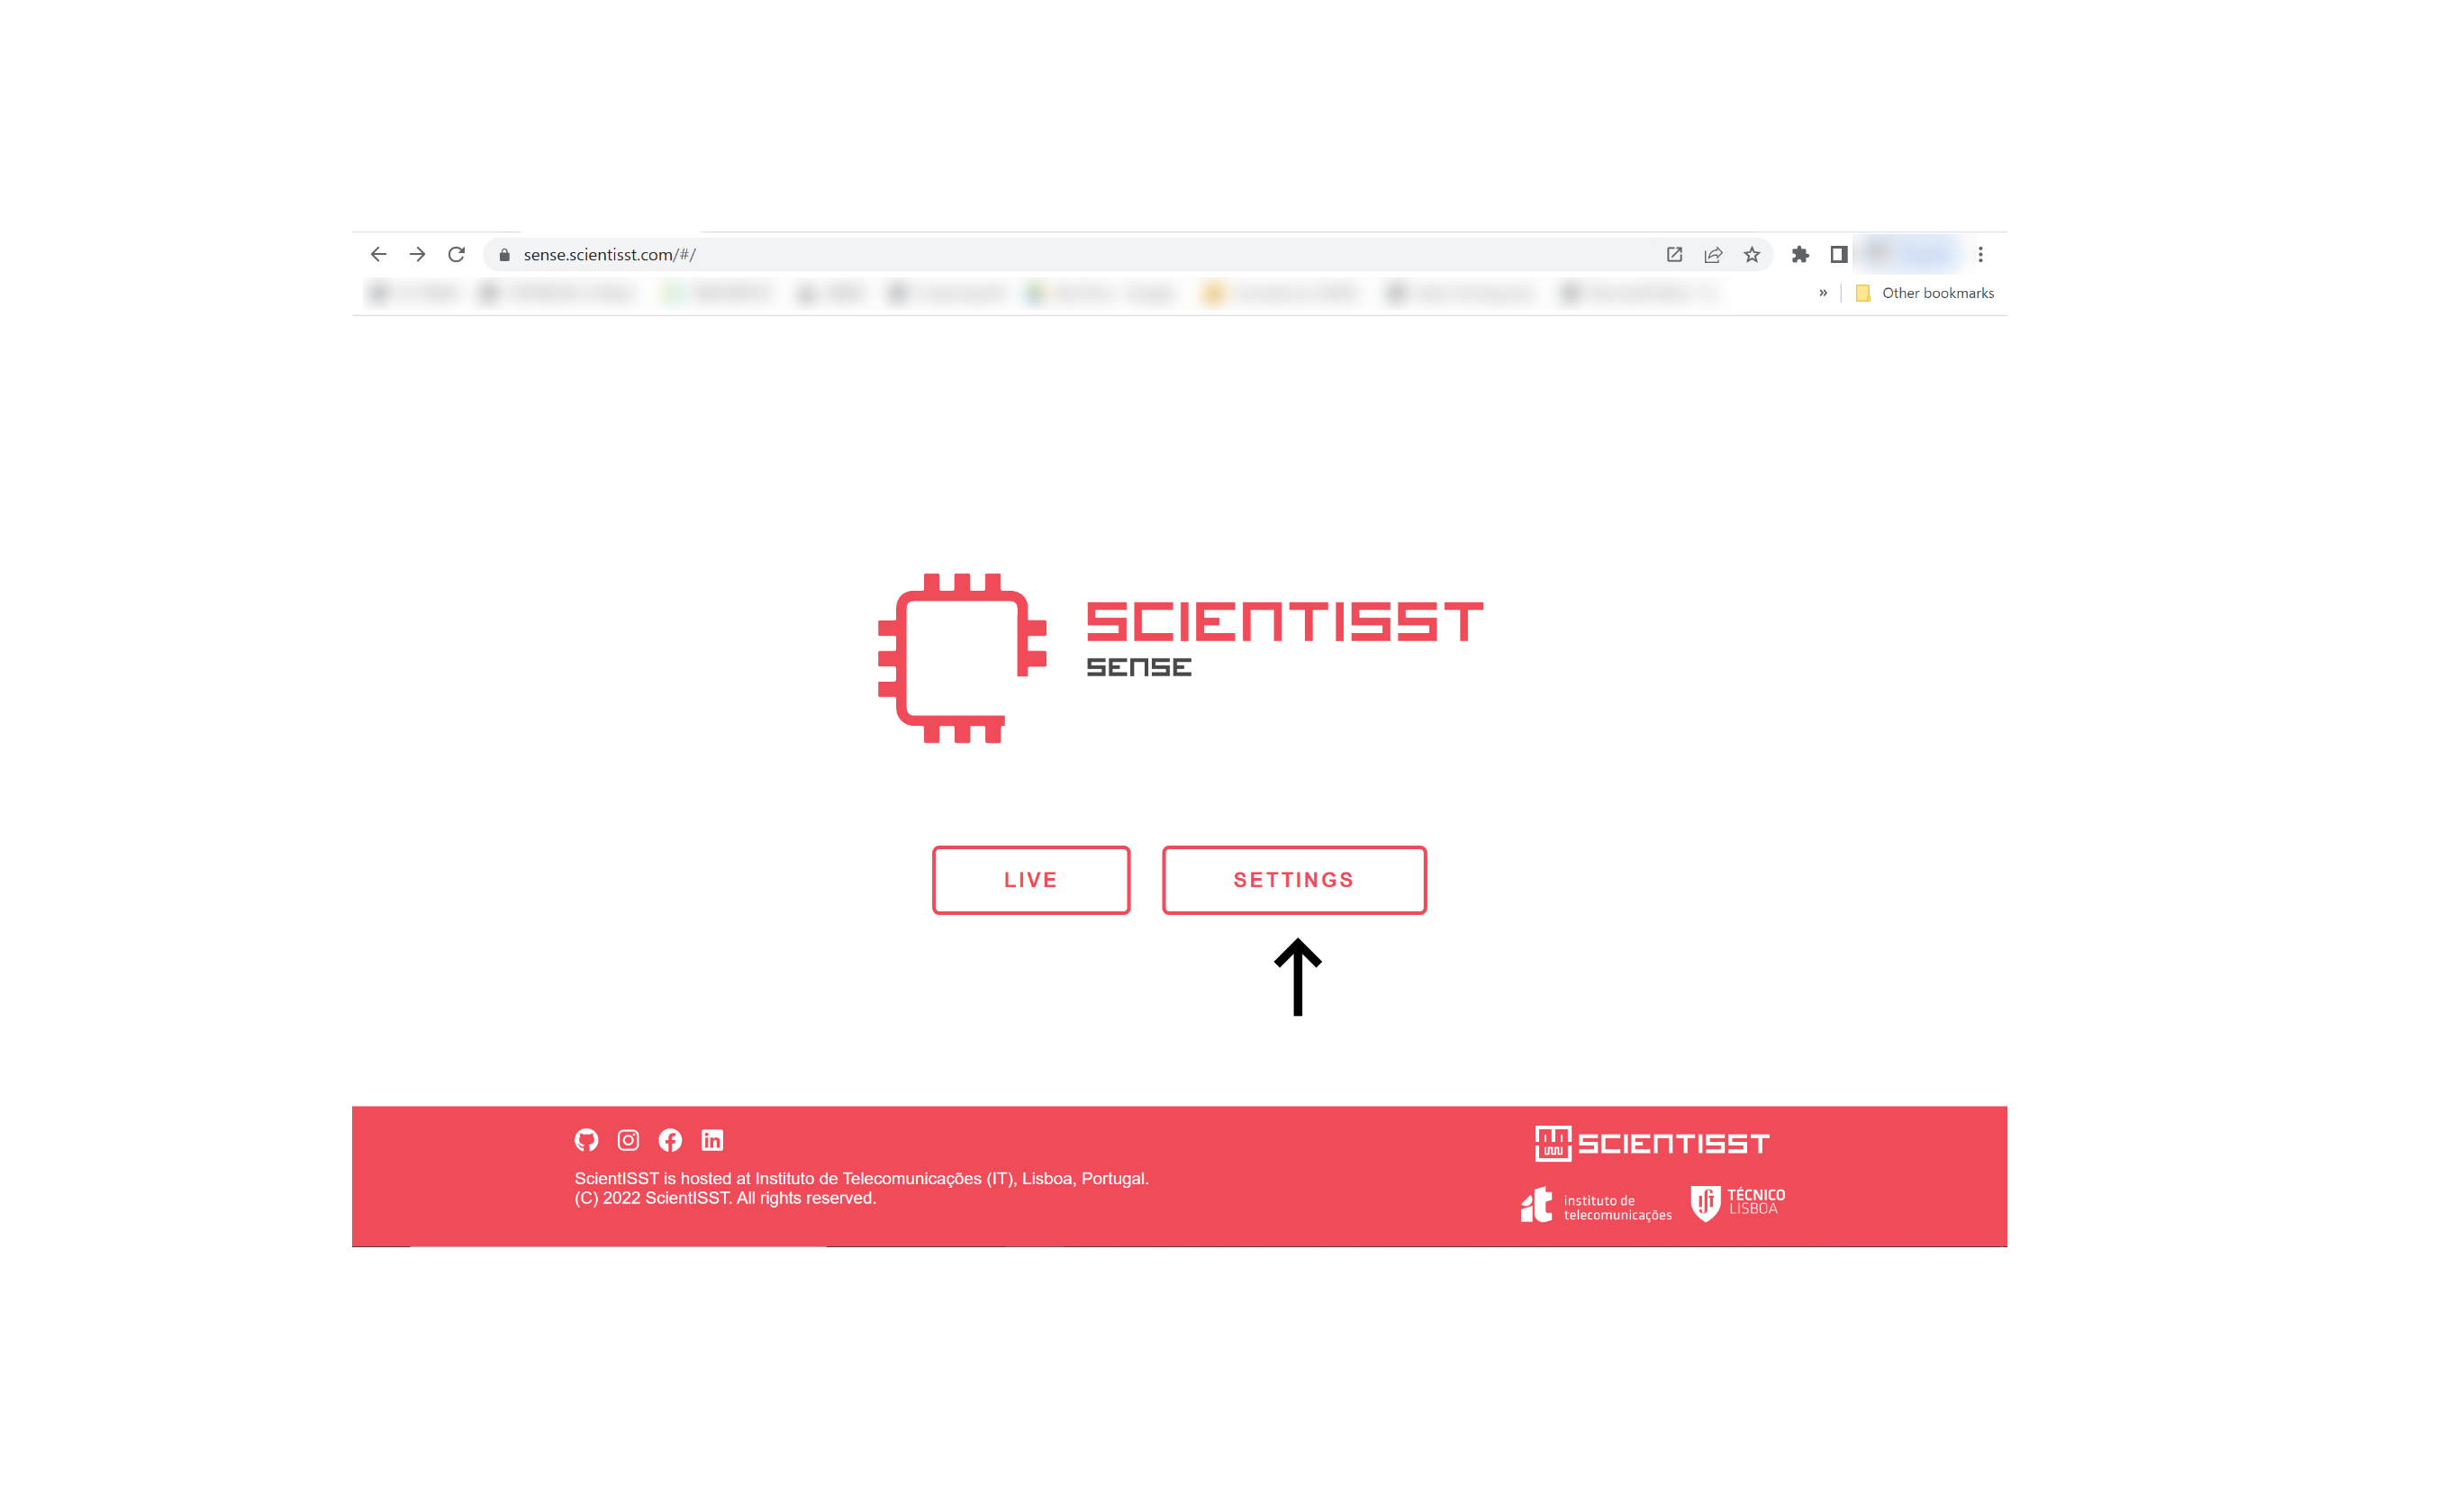

Here you need to configure:
1. The communication protocol. Select Bluetooth. 
2. The sampling rate. The default value of 1000Hz is enough for this workshop's experiments.
3. The Analog channels that will be enabled. We will use just AI1 for the ECG sensor, thus if you want, you can turn off all the other ones.

After this, go back to the menu.

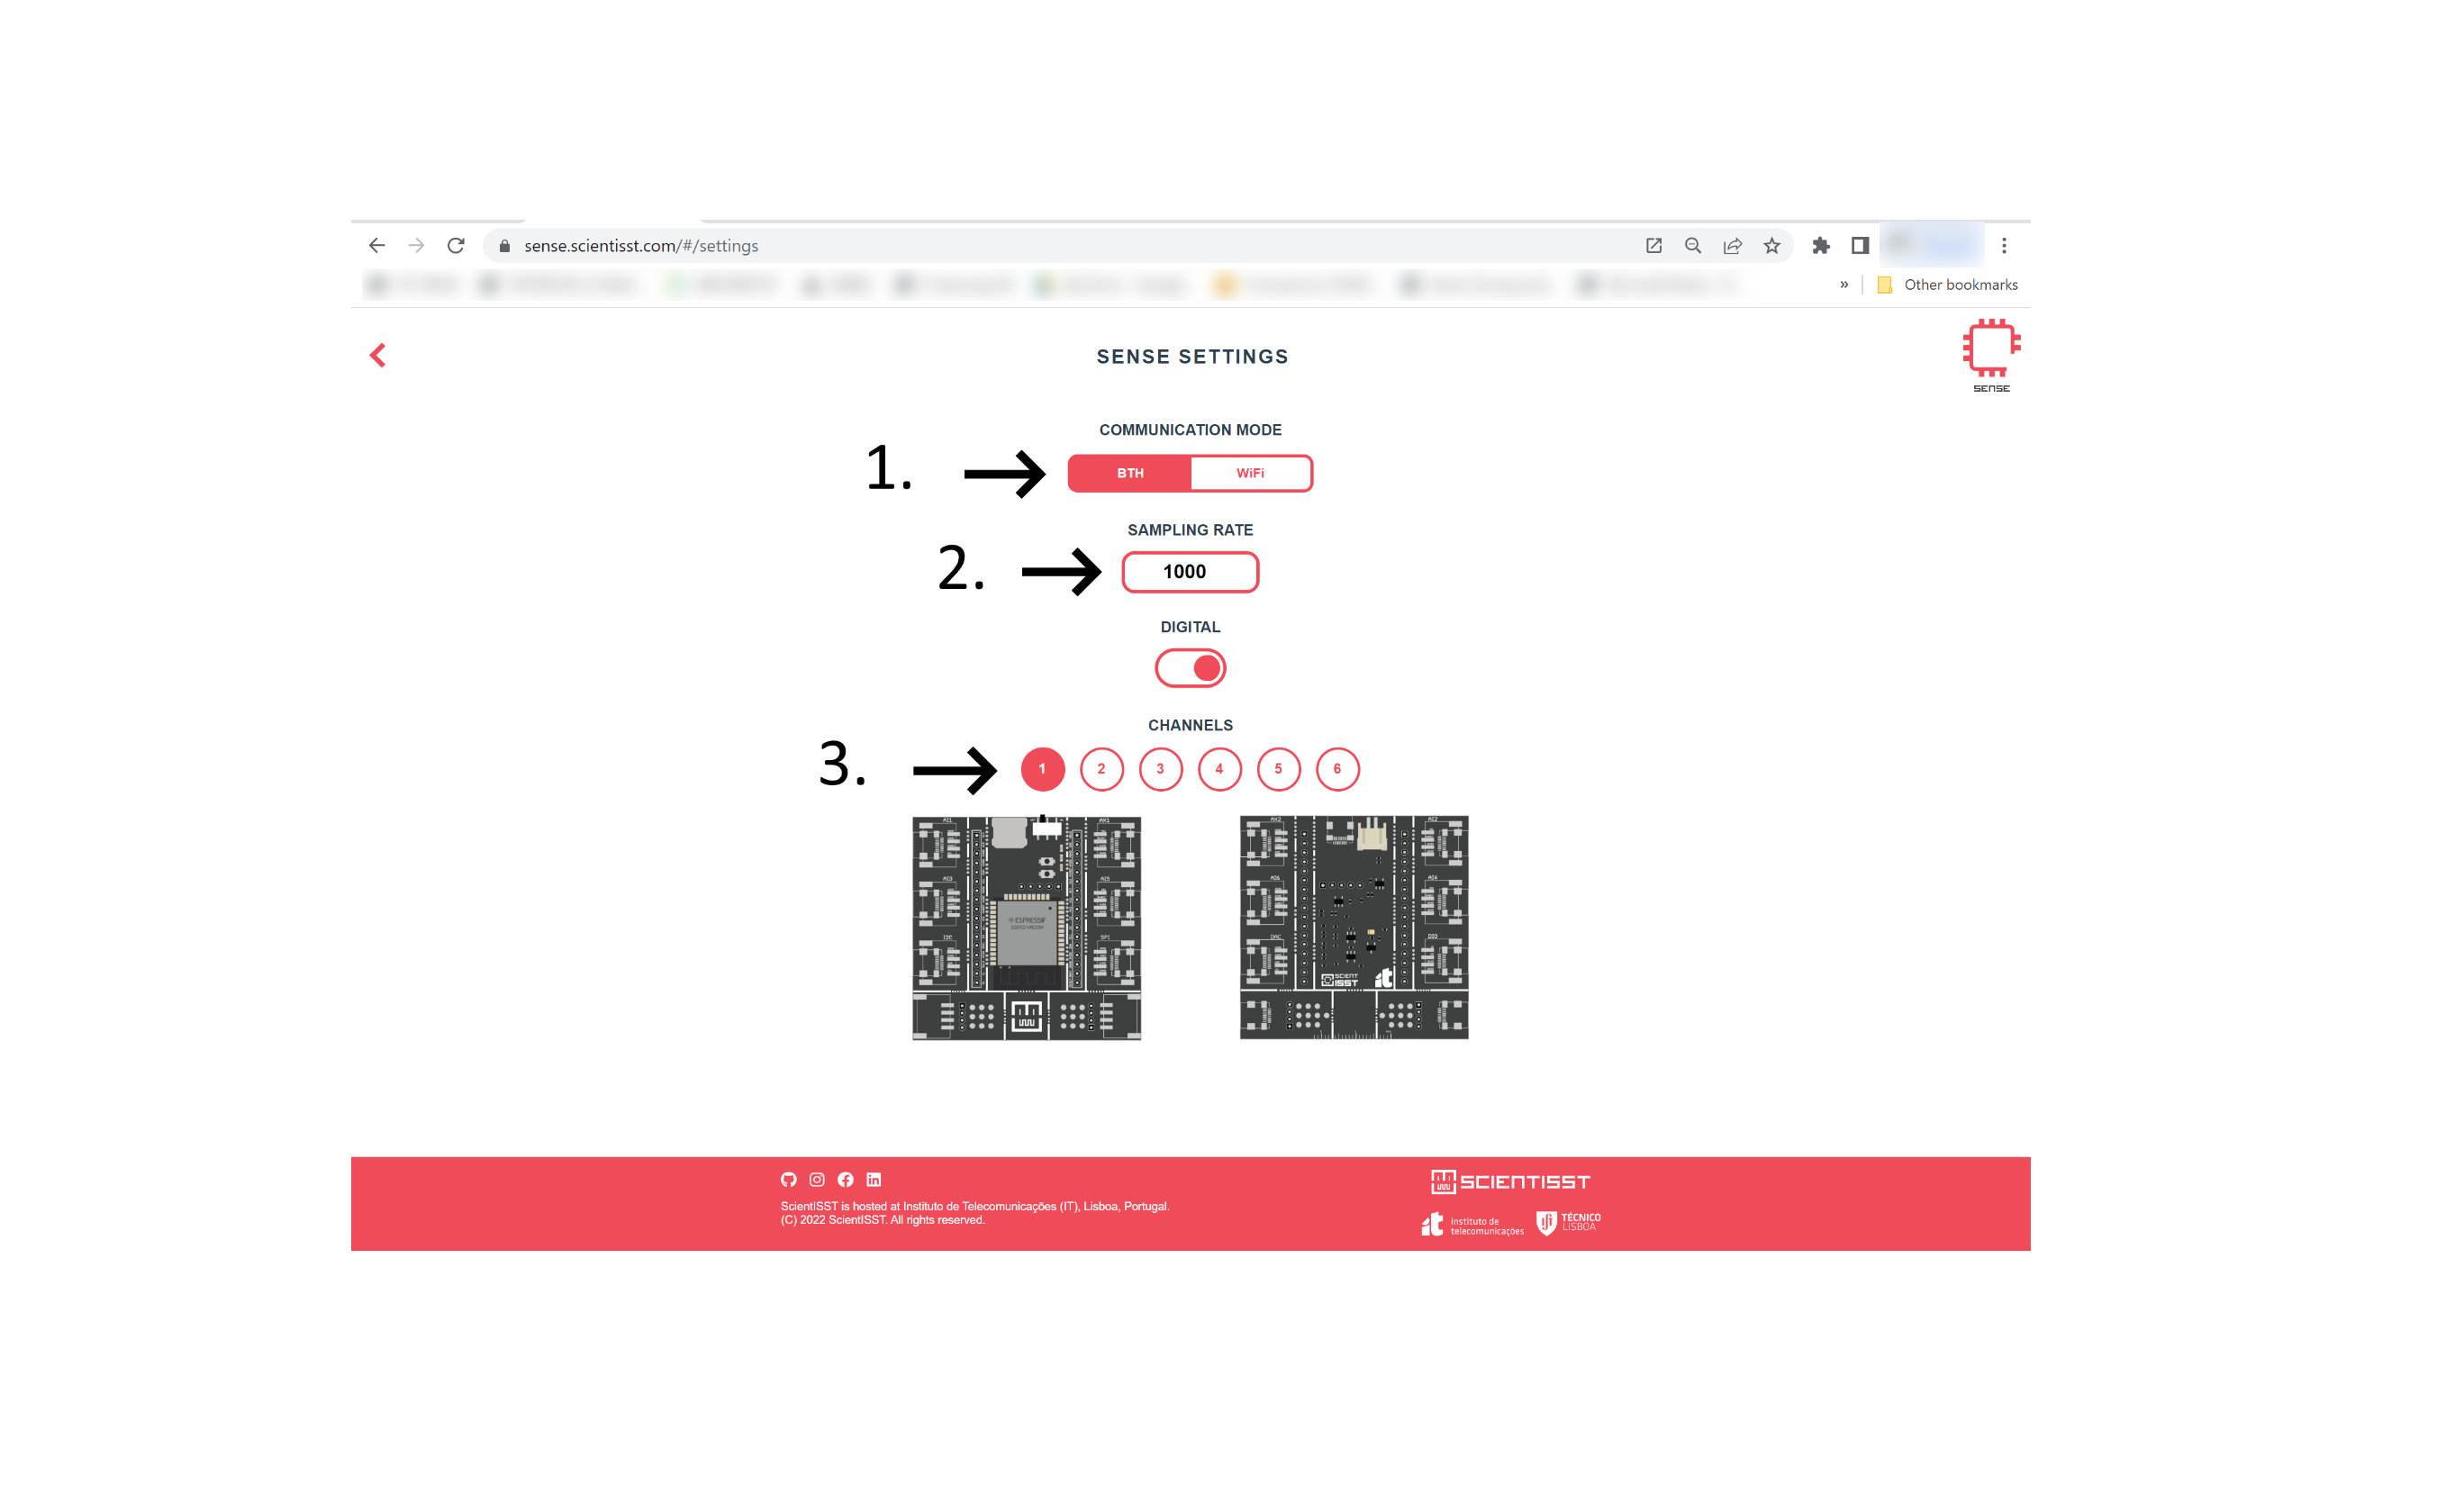

Go to "live" to start a simple acquisition.

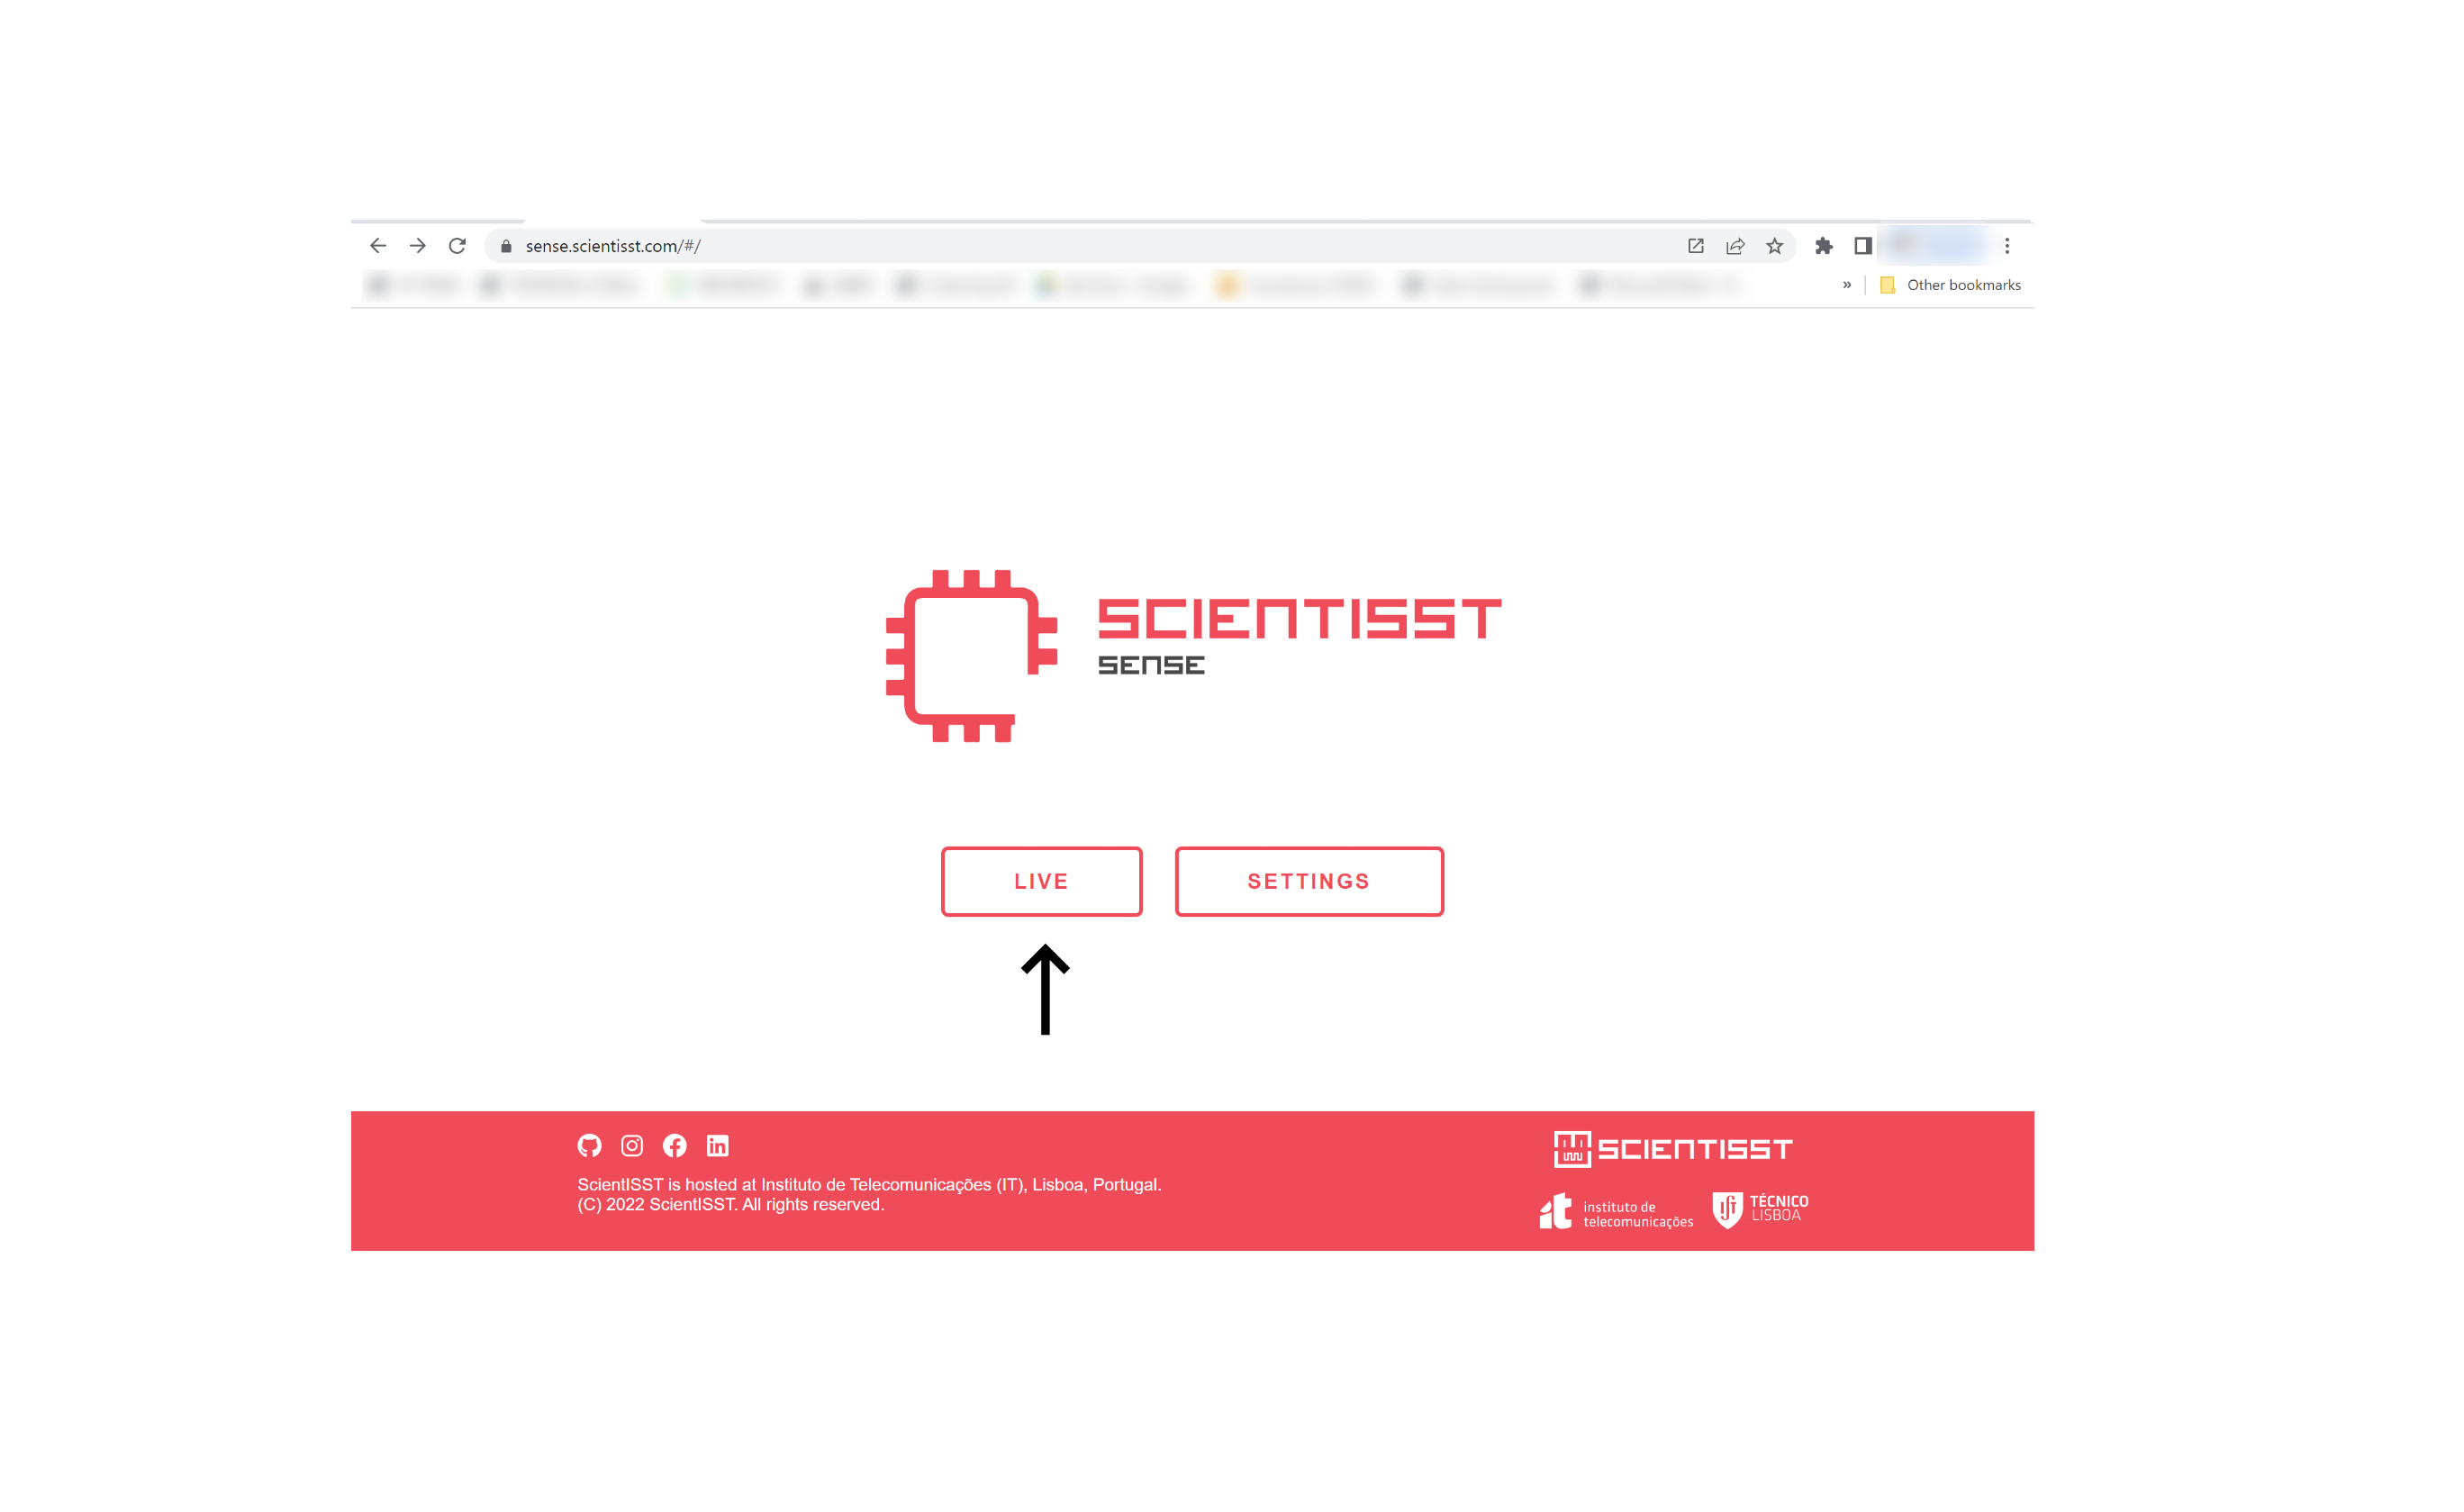

1. Click "connect". A pop-up window will show up.
2. From the menu, choose the PORT number that corresponds to your device. If you don't know which one it is, you can check it on the Bluetooth settings of your computer.

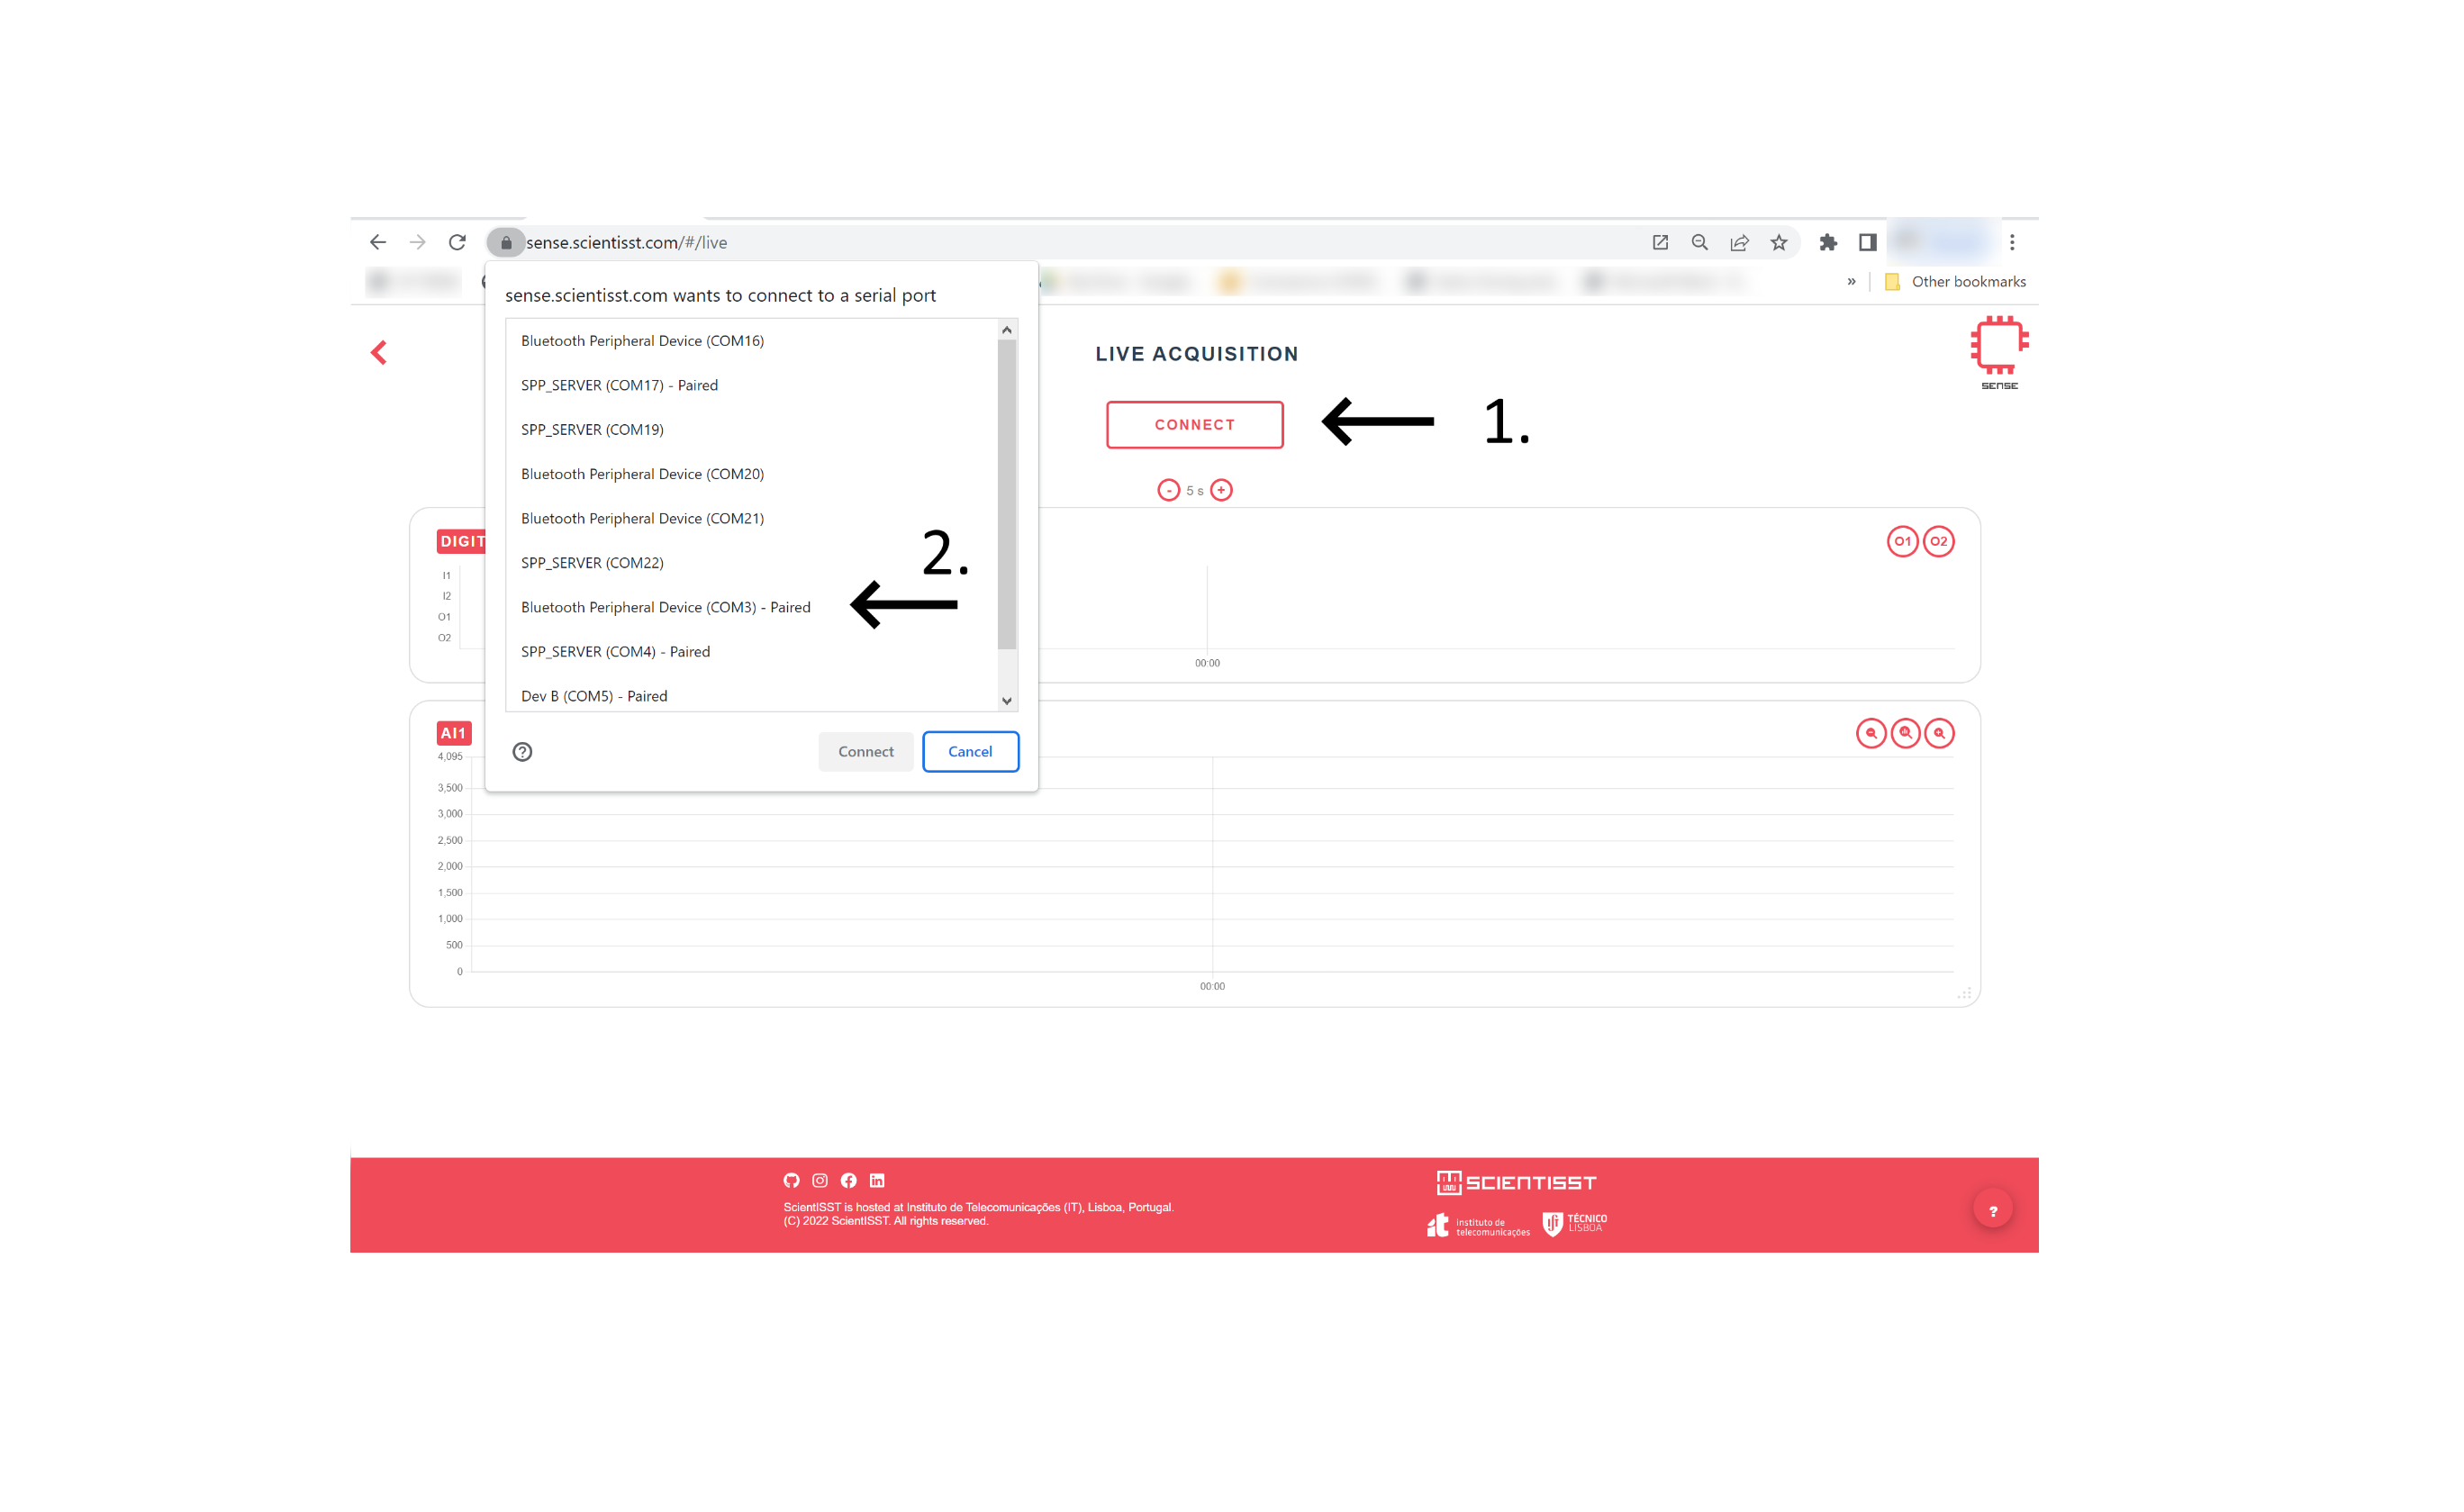

If you were successful, you can start an acquisition.


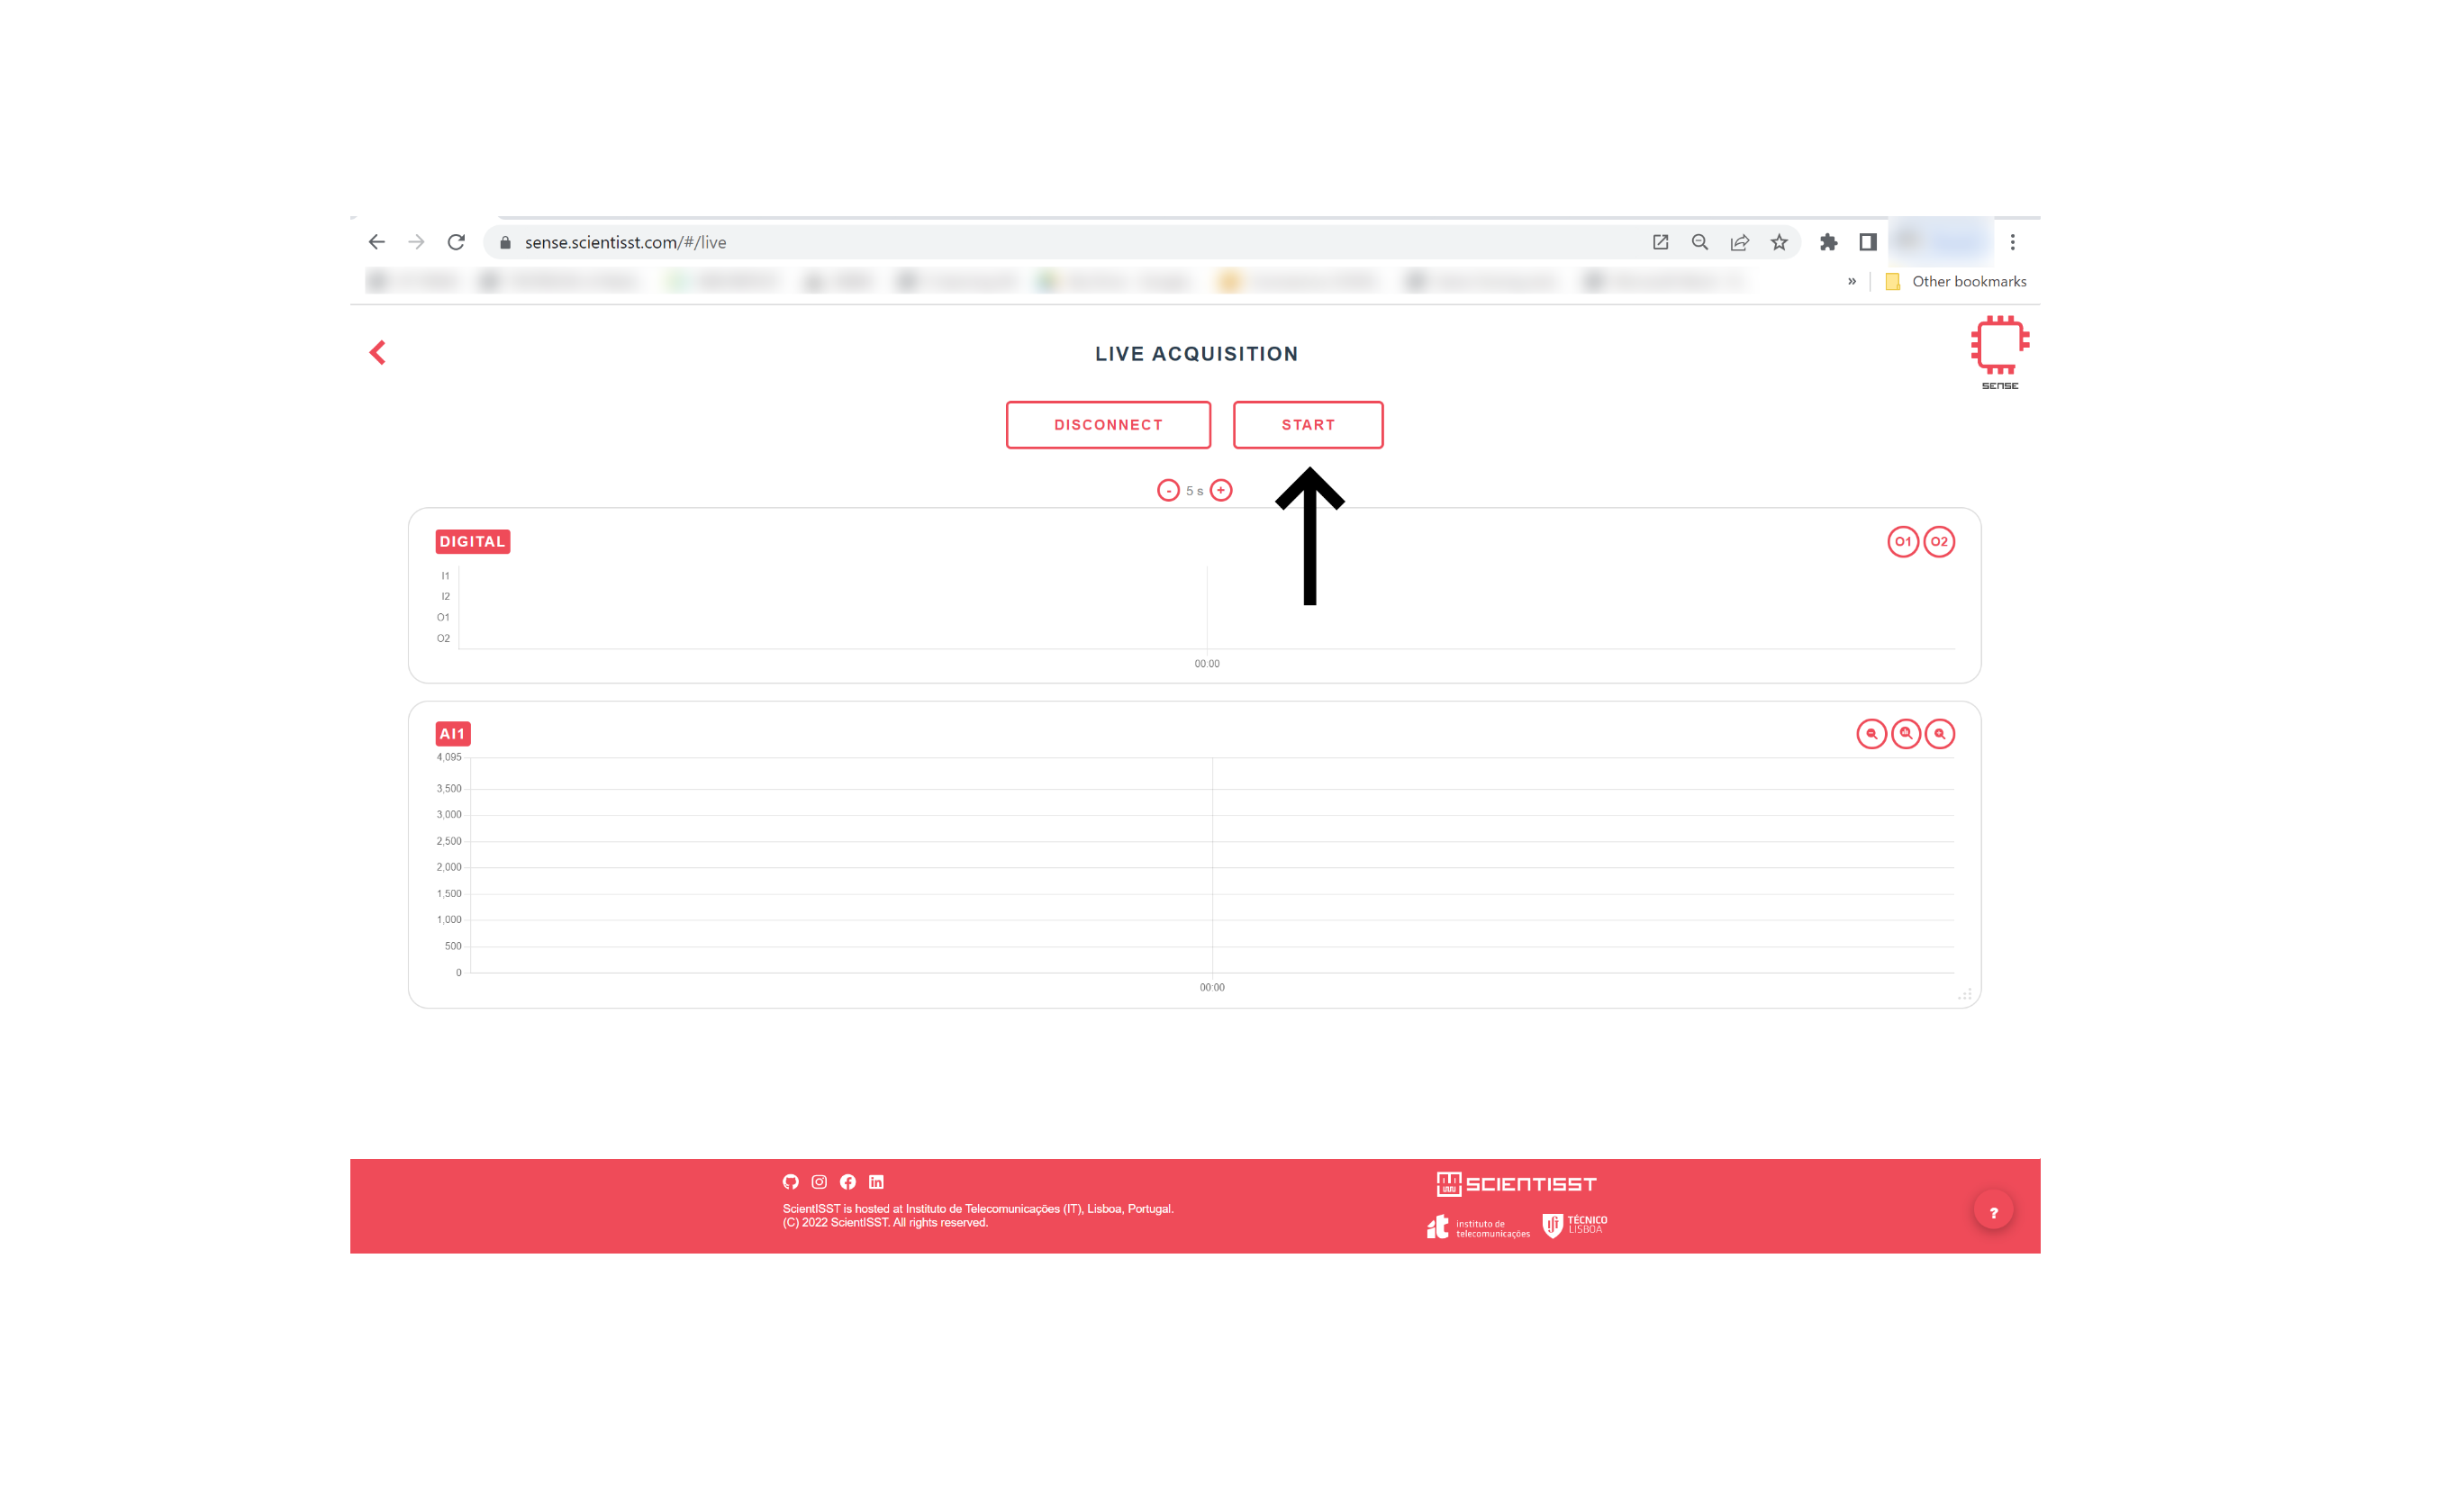


As a sanity check, while the scientISST is recording, you can try using jumper wires to make short-circuits:
1. Connecting Vcc to AI1 should read as 4095 (raw data) or close to 3300 (mV)
2. Connecting Vref to AI1 should read as 2047 (raw data) or close to 1650 (mV)


To save the recorded signal(s), all you need to do is press "download" after you stop the acquisition. A CSV file will be downloaded.

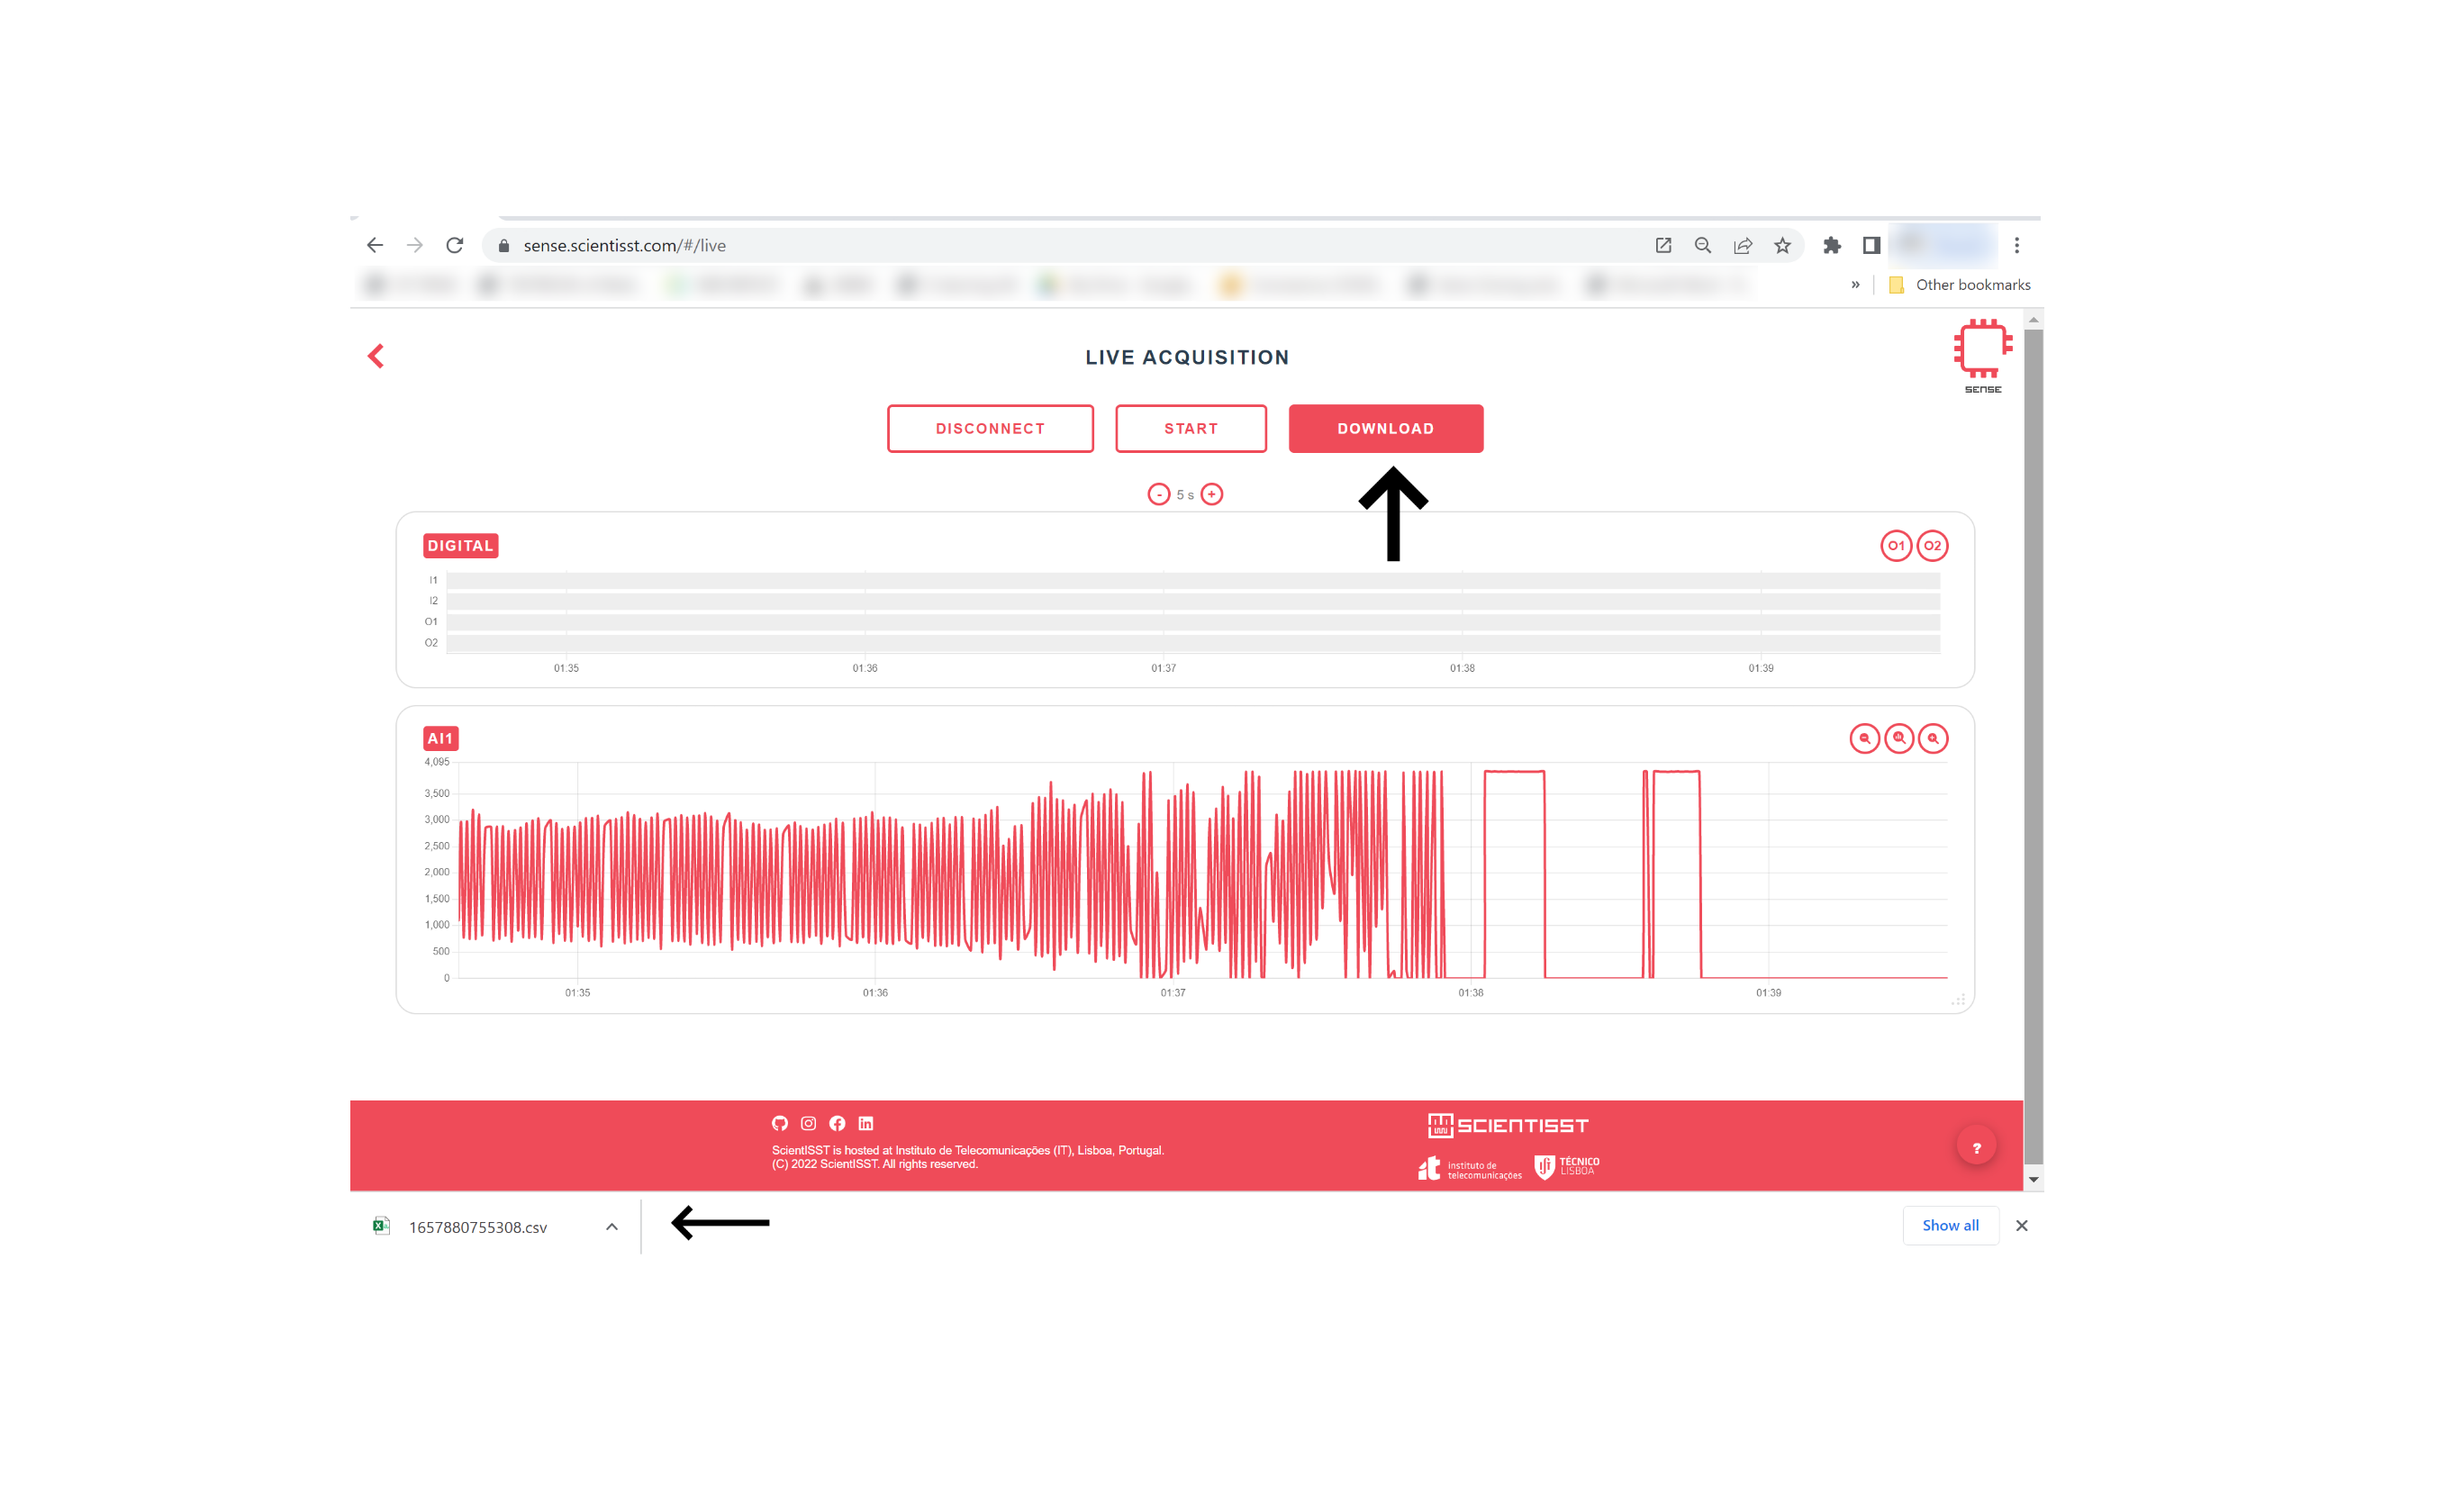

## Task 2 - Standard ECG

Now, perform an ECG acquisition by first connecting the **standard pre-gelled ECG electrodes** to the ECG sensor.

After finishing, download the CSV file and rename to something like **"standard_ecg.csv"** (just so you know which electrodes you used).

## Task 3 - Sampling Frequency

What happens if we decrease the sampling frequency?

Try an ECG acquisition at a sampling frequency of 10Hz

Can you still see the R peaks?

## Task 4 - Invisibles

**Disconnect the standard pre-gelled ECG electrodes** from the sensor and **connect the textile electrodes**. 

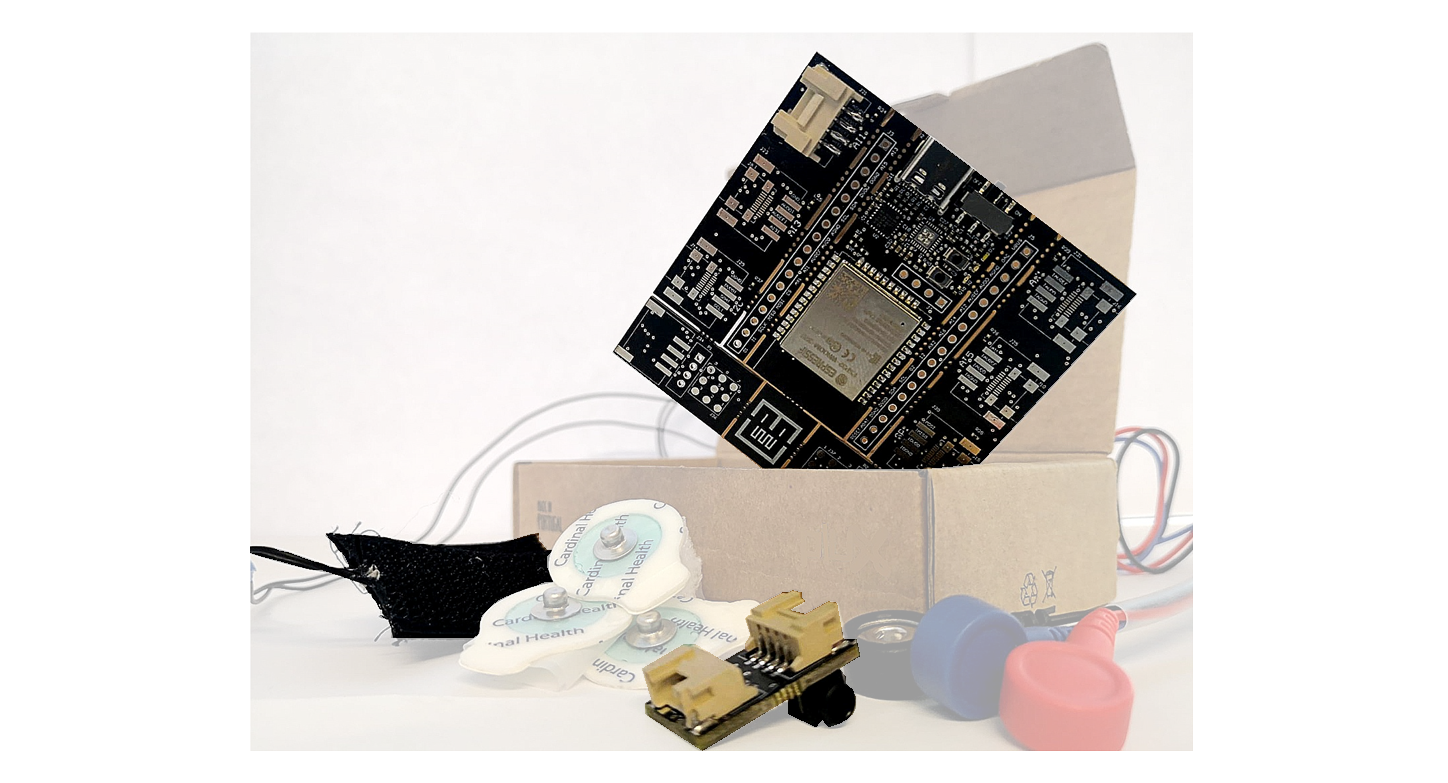

Now, **while touching the textile electrodes**, perform a new acquisition.

Does the signal look the same as with the standard electrodes?

After finishing, download the CSV file and rename to something like **"textile_ecg.csv"**

## Task 5 - BiosPPy

Note: If the textile sensors didn't work so well for you (i.e. noisy signal), use the signal you obtained through the standard pre-gelled ones for this task, or perform a new acquisition on your colleagues (each person has their own electrical potential).

Let's process the signals on BioSSPY!
Load your saved signal like:
```
import pandas as pd
ecg_signal = pd.read_csv("<your ecg's CSV file name>.csv")
```

```
import numpy as np
ecg_signal = np.loadtxt("<your ecg's file name>.txt")
```

The rest of the code will select the data from the channel you used. You can either use AX_raw or AX_mv, where X is the channel number you used.

In [7]:
import numpy as np
import csv

# filename of the recording
record_filename = '1657876273179.csv'

# reading the recorded data
record_data = np.loadtxt(record_filename, delimiter='\t')

# a function to get the header
with open(record_filename, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    _ = next(reader)
    record_header = next(reader)
    record_header[0] = record_header[0][1:]
    
# print(record_header)

AI1_idx = record_header.index('AI1_mv')
ecg_signal = record_data[:, AI1_idx]

# print(ecg_signal.shape)
# print(ecg_signal)

Now, run the BiosPPy's ECG feature visualizer:
```
from biosppy.signals import ecg

%matplotlib qt

# process it and plot
out = ecg.ecg(signal=ecg_signal, sampling_rate=1000., show=True)
```

In [4]:
import biosppy
from biosppy.signals import ecg

%matplotlib qt

# process it and plot
out = ecg.ecg(signal=ecg_signal, sampling_rate=1000., show=True)

Is your heart-rate realistic? Does the signal ok or too noisy?

That's all. Thank you for attending the workshop :)